<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/1%EC%9B%9420%EC%9D%BC_%EB%B6%84%EC%82%B0_%ED%91%9C%EC%A4%80%ED%8E%B8%EC%B0%A8_%EA%B3%B5%EB%B6%84%EC%82%B0_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_MSE_%EC%82%AC%EB%B6%84%EC%9C%84%EC%88%98_%EC%9D%B4%EC%83%81%EC%B9%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%95%EA%B7%9C%ED%99%94_%EC%88%98%EC%97%85%EB%82%B4%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
A = pd.DataFrame({'sal':[1200, 1600, 5600, 6000, 7000]})

In [ ]:
A

,sal
0,1200
1,1600
2,5600
3,6000
4,7000


In [ ]:
# A회사 연봉의 평균
A.mean()

sal    4280.0
dtype: float64

In [ ]:
# 편차
A - A.mean()

,sal
0,-3080.0
1,-2680.0
2,1320.0
3,1720.0
4,2720.0


In [ ]:
# B회사 연봉
B = pd.DataFrame({'sal':[4000, 4500, 4250, 5000, 3650]})

In [ ]:
B

,sal
0,4000
1,4500
2,4250
3,5000
4,3650


In [ ]:
# B회사 연봉의 평균
B.mean()

sal    4280.0
dtype: float64

In [ ]:
# B회사 월급의 편차
B - B.mean()

,sal
0,-280.0
1,220.0
2,-30.0
3,720.0
4,-630.0


### 분산
- 편차 제곱을 데이터의개수-1 로 나눈것
- 데이터의 차이를 하나의 숫자로 나타냄

In [ ]:
import math

In [ ]:
(A-A.mean())**2

,sal
0,9486400.0
1,7182400.0
2,1742400.0
3,2958400.0
4,7398400.0


- [자유도(n-1)에 대한 설명](https://m.blog.naver.com/sw4r/221021838997)

In [ ]:
# A회사의 분산을 계산 : 편차 제곱의 합을 (데이터개수-1)로 나눔
((A-A.mean())**2).sum() / (5-1)

sal    7192000.0
dtype: float64

In [ ]:
# B회사의 분산을 계산
((B-B.mean())**2).sum() / 4

sal    260750.0
dtype: float64

In [ ]:
# A회사의 분산
A.var()

sal    7192000.0
dtype: float64

In [ ]:
# B회사의 분산
B.var()

sal    260750.0
dtype: float64

### 표준편차
- 분산에 루트를 계산

In [ ]:
# A회사의 표준편차 계산
math.sqrt( ((A-A.mean())**2).sum() / 4)

2681.790446697877

In [ ]:
# B회사의 표준편차 계산
math.sqrt( ((B-B.mean())**2).sum() / 4)

510.63685726747144

In [ ]:
# A회사의 표준편차
A.std()

sal    2681.790447
dtype: float64

In [ ]:
# B회사의 표준편차
B.std()

sal    510.636857
dtype: float64

### 공분산
- 두개의 컬럼 X와 Y가 있을때 컬럼1이 증가할때 컬럼2가 같이 증가하는가 아니면 감소하는가를 나타내는 지표
- "영어 점수가 낮으면 국어점수도 낮은가?"

In [ ]:
# 영어점수와 국어점수를 저장하는 데이터프레임
df01 = pd.DataFrame({'eng_rank':[1,4,2,9,9], 'kor_rank':[3,2,7,3,10]})

In [ ]:
# 영어점수 평균
eng_mean = df01['eng_rank'].mean()

In [ ]:
eng_mean

5.0

In [ ]:
# 국어점수 평균
kor_mean = df01['kor_rank'].mean()

In [ ]:
kor_mean

5.0

In [ ]:
# 영어 점수에서 영어 점수 평균을 뺌
eng_sub = df01['eng_rank'] - eng_mean
eng_sub

0   -4.0
1   -1.0
2   -3.0
3    4.0
4    4.0
Name: eng_rank, dtype: float64

In [ ]:
# 국어 점수에서 국어 점수 평균을 뺌
kor_sub = df01['kor_rank'] - kor_mean
kor_sub

0   -2.0
1   -3.0
2    2.0
3   -2.0
4    5.0
Name: kor_rank, dtype: float64

In [ ]:
# 수의 의미: 예를들어 국어는 짱잘하고 영어는 짱못하면 엄청큰 음수 나옴. 국어도 잘하고 영어도 잘하면 양수
eng_sub*kor_sub

0     8.0
1     3.0
2    -6.0
3    -8.0
4    20.0
dtype: float64

In [ ]:
# 공분산이 0이 아니고 양수: 영어점수가 증가하면 국어점수도 증가. 영어점수 감소하면 국어 점수도 감소.
sum(eng_sub*kor_sub) / 4

4.25

In [ ]:
# 공분산 조회
df01.cov()

,eng_rank,kor_rank
eng_rank,14.50,4.25
kor_rank,4.25,11.50


In [ ]:
# 왼쪽부터 대각선은 영어의 분산, 국어의 분산
print(df01['eng_rank'].var())
print(df01['kor_rank'].std() ** 2)

14.5
11.5


### 상관관계
- 공분산을 X와 Y의 표준편차(X, Y에 저장된 값들의 차이)로 나눠서 비율을 조회
- 숫자값이 저장된 컬럼 사이의 상관관계를 계산

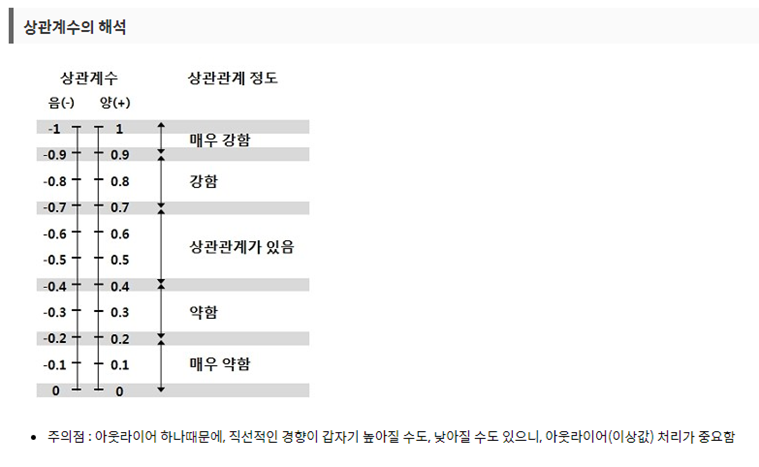

#### 상관 관계의 계산
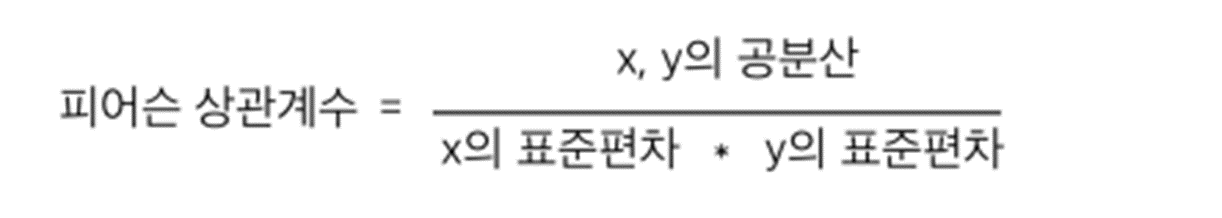

In [ ]:
( df01['eng_rank'] - 5 ) ** 2

0    16
1     1
2     9
3    16
4    16
Name: eng_rank, dtype: int64

In [ ]:
( df01['kor_rank'] - 5 ) ** 2

0     4
1     9
2     4
3     4
4    25
Name: kor_rank, dtype: int64

In [ ]:
# 영어점수의 분산
sum(( df01['eng_rank'] - 5 ) ** 2) / 4

14.5

In [ ]:
# 국어점수의 분산
sum(( df01['kor_rank'] - 5 ) ** 2) / 4

11.5

In [ ]:
# 영어점수의 표준편차
math.sqrt(sum(( df01['eng_rank'] - 5 ) ** 2) / 4)

3.8078865529319543

In [ ]:
# 국어점수의 표준편차
math.sqrt(sum(( df01['kor_rank'] - 5 ) ** 2) / 4)

3.391164991562634

In [ ]:
# 상관관계 조회
df01.cov() / (df01['eng_rank'].std() * df01['kor_rank'].std())

,eng_rank,kor_rank
eng_rank,1.122884,0.329121
kor_rank,0.329121,0.890564


In [ ]:
# 상관관계 조회
df01.corr()

,eng_rank,kor_rank
eng_rank,1.000000,0.329121
kor_rank,0.329121,1.000000


#### 예: 영어점수와 국어점수가 같다면 상관계수는?
- 영어 평균 3, 국어평균 3

In [ ]:
df01 = pd.DataFrame({
    'eng_rank': [1,2,3,4,5],
    'kor_rank': [1,2,3,4,5]
})

In [ ]:
# 영어 편차 (영어 - 영어 평균)
df01['eng_rank'] - 3

0   -2
1   -1
2    0
3    1
4    2
Name: eng_rank, dtype: int64

In [ ]:
# 국어 편차 (국어 - 국어 평균)
df01['kor_rank'] - 3

0   -2
1   -1
2    0
3    1
4    2
Name: kor_rank, dtype: int64

In [ ]:
# 대각선이 공분산
df01.cov()

,eng_rank,kor_rank
eng_rank,2.5,2.5
kor_rank,2.5,2.5


In [ ]:
# 두 점수가 같을 때 상관계수는 1이 된다.
df01.cov() / (df01['eng_rank'].std()*df01['kor_rank'].std())

,eng_rank,kor_rank
eng_rank,1.0,1.0
kor_rank,1.0,1.0


In [ ]:
# 상관 관계 조회
df01.corr()

,eng_rank,kor_rank
eng_rank,1.0,1.0
kor_rank,1.0,1.0


#### 예: 영어점수와 국어점수가 반대로 되어있다면 상관계수는? -1.
- 영어 평균 3, 국어평균 3

In [ ]:
df01 = pd.DataFrame({
    'eng_rank': [1,2,3,4,5],
    'kor_rank': [5,4,3,2,1]
})

In [ ]:
df01.corr()

,eng_rank,kor_rank
eng_rank,1.0,-1.0
kor_rank,-1.0,1.0


#### 예: 영어점수와 국어점수가 들쭉날쭉하면? 
- 상관계수의 절대값이 줄어듬.

In [ ]:
df01 = pd.DataFrame({
    'eng_rank': [1,2,3,4,5],
    'kor_rank': [5,1,3,2,4]
})

In [ ]:
(df01['eng_rank'] - 3) * (df01['kor_rank'] - 3) # 양수 음수 섞임

0   -4
1    2
2    0
3   -1
4    2
dtype: int64

In [ ]:
df01['eng_rank'].std()

1.5811388300841898

In [ ]:
df01['kor_rank'].std()

1.5811388300841898

In [ ]:
# 공분산 구하기
sum((df01['eng_rank'] - 3) * (df01['kor_rank'] - 3)) / 4

-0.25

In [ ]:
df01.cov()

,eng_rank,kor_rank
eng_rank,2.50,-0.25
kor_rank,-0.25,2.50


In [ ]:
# 상관계수
df01.cov() / ( df01['eng_rank'].std() * df01['kor_rank'].std() )

,eng_rank,kor_rank
eng_rank,1.0,-0.1
kor_rank,-0.1,1.0


In [ ]:
df01.corr()

,eng_rank,kor_rank
eng_rank,1.0,-0.1
kor_rank,-0.1,1.0


#### 상관계수가 0일때
- 공분산이 0일때

1.   x, y 중 하나의 모든 데이터가 평균과 같다
2.   증가, 감소하는 데이터가 딱 반반이다.



# 회귀분석 성능 측정

## Mean Squared Error(MSE)
- ((찐 - 예측) 제곱의 합) / (데이터수)

In [ ]:
X_test = np.array( [100, 50, 10, 70] )

In [ ]:
pred = np.array( [100.5, 49.5, 10.1, 69.9] )

In [ ]:
X_test - pred

array([-0.5,  0.5, -0.1,  0.1])

In [ ]:
(X_test-pred) ** 2

array([0.25, 0.25, 0.01, 0.01])

In [ ]:
sum((X_test-pred) ** 2)

0.5199999999999988

In [ ]:
# Mean Squared Error
sum((X_test-pred) ** 2) / 4

0.1299999999999997

In [ ]:
# 값 바꿔보기

X_test = np.array( [100, 50, 10, 70] )

In [ ]:
pred = np.array( [120, 30, 0, 80] )

In [ ]:
X_test - pred

array([-20,  20,  10, -10])

In [ ]:
(X_test - pred) ** 2

array([400, 400, 100, 100])

In [ ]:
sum((X_test-pred) ** 2) / 4

250.0

- 오차의 절대값이 1 미만인 경우 제곱하면 오히려 제곱값은 줄어든다. (패널티를 줄여주는 결과)
- 반대로 오차의 절대값이 1을 초과할 경우 제곱하면 패널티 세게 된다.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(X_test, pred)

250.0

# 사분위수

In [2]:
import pandas as pd

In [3]:
df01 = pd.DataFrame({
    'num':[ 100, 10, 200, 1000, 40, 300, 800, 50, 70, 500 ]
})

In [4]:
df01['num'].sort_values()

1      10
4      40
7      50
8      70
0     100
2     200
5     300
9     500
6     800
3    1000
Name: num, dtype: int64

In [5]:
import numpy as np

In [6]:
np.percentile(df01['num'], 25)

55.0

In [7]:
np.percentile(df01['num'], 75)

450.0

In [8]:
np.percentile(df01['num'], 50)

150.0

## 이상값

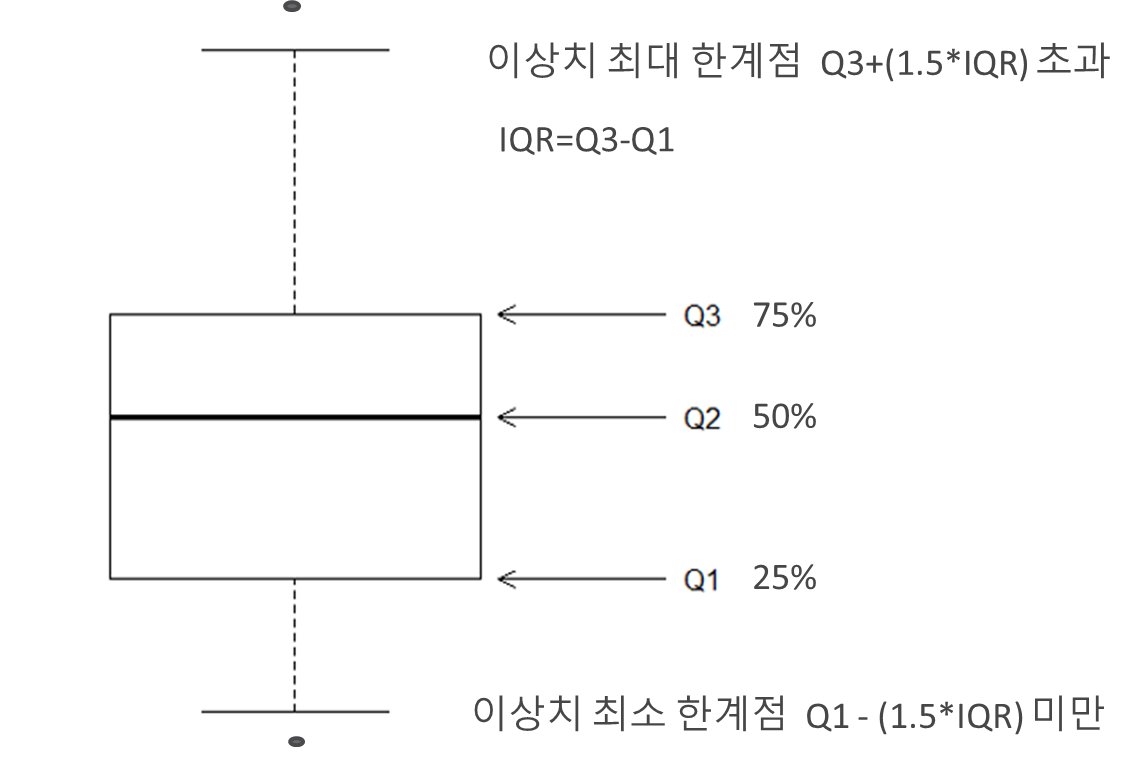

In [9]:
# 표본 10명의 연봉

df01 = pd.DataFrame({
    'sal': [4000, 8000, 10000, 50, 3000, 6000, 6400000, 7000, 2000, 3500]
})

In [10]:
np.percentile(df01['sal'], 25)

3125.0

In [11]:
np.percentile(df01['sal'], 75)

7750.0

In [12]:
q1 = np.percentile(df01['sal'], 25)

In [13]:
q3 = np.percentile(df01['sal'], 75)

IQR = Q3 - Q1

In [14]:
IQR = q3 - q1

In [15]:
# 이상치 최대 한계점
q3 + 1.5*IQR

14687.5

In [16]:
df01

,sal
0,4000
1,8000
2,10000
3,50
4,3000
5,6000
6,6400000
7,7000
8,2000
9,3500


In [17]:
# 이상치 최소 한계점
q1 - 1.5*IQR

-3812.5

In [18]:
df01[ (df01['sal'] >= q1-(1.5*IQR)) & (df01['sal'] <= q3+(1.5*IQR)) ] 

,sal
0,4000
1,8000
2,10000
3,50
4,3000
5,6000
7,7000
8,2000
9,3500


# 데이터정규화

In [19]:
import math

In [20]:
math.e

2.718281828459045

In [22]:
math.e ** 3

20.085536923187664

In [24]:
np.log(20.085536923187664)

3.0

In [25]:
math.e ** 4

54.59815003314423

In [26]:
np.log(54.59815003314423)

4.0

In [27]:
import seaborn as sns

In [28]:
df01 = pd.DataFrame({
                       "num":[0, 400, 0.1, 300, 200, 9, 8, 7, 6, 0.2, 5, 4, 3]
                    })

In [29]:
df01

,num
0,0.0
1,400.0
2,0.1
3,300.0
4,200.0
5,9.0
6,8.0
7,7.0
8,6.0
9,0.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


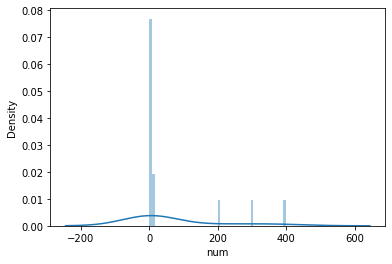

In [30]:
sns.distplot(df01['num'])

In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [33]:
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


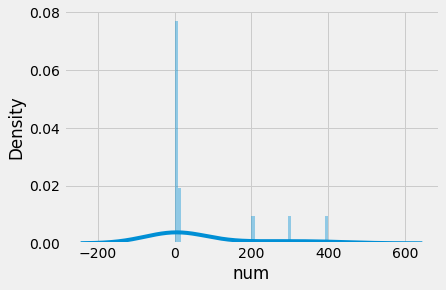

In [34]:
sns.distplot(df01['num'])

In [35]:
df01['num']

0       0.0
1     400.0
2       0.1
3     300.0
4     200.0
5       9.0
6       8.0
7       7.0
8       6.0
9       0.2
10      5.0
11      4.0
12      3.0
Name: num, dtype: float64

In [39]:
# 0 때문에 음의 무한대가 나옴
np.log(df01['num'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         -inf
1     5.991465
2    -2.302585
3     5.703782
4     5.298317
5     2.197225
6     2.079442
7     1.945910
8     1.791759
9    -1.609438
10    1.609438
11    1.386294
12    1.098612
Name: num, dtype: float64

In [40]:
np.log(df01['num']+1)

0     0.000000
1     5.993961
2     0.095310
3     5.707110
4     5.303305
5     2.302585
6     2.197225
7     2.079442
8     1.945910
9     0.182322
10    1.791759
11    1.609438
12    1.386294
Name: num, dtype: float64

In [41]:
# log1p 해주면 된다!
np.log1p(df01['num'])

0     0.000000
1     5.993961
2     0.095310
3     5.707110
4     5.303305
5     2.302585
6     2.197225
7     2.079442
8     1.945910
9     0.182322
10    1.791759
11    1.609438
12    1.386294
Name: num, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


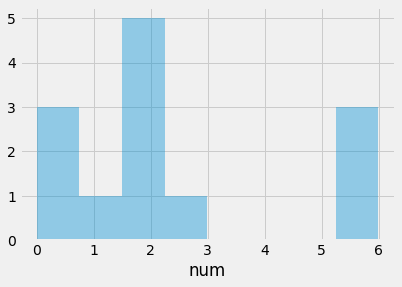

In [43]:
sns.distplot( np.log1p(df01['num']), kde=False )

In [48]:
# 로그 안 취한 값 알아보기

math.e ** 0.0959

1.1006489935911914

In [44]:
np.exp( 0.0959 )

1.1006489935911914